In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [58]:
df = pd.read_csv('arbitrage_results.csv')

In [3]:
df.head()

,timestamp,price,action_kw,energy_kwh,soc_before,soc_after,revenue,cumulative_revenue
0,2025-09-13 13:00:00+00:00,0.000179,0.0,0.000000,250.00000,250.00000,0.000000,0.000000
1,2025-09-13 13:05:00+00:00,0.042592,-100.0,-8.333333,250.00000,241.22807,0.353482,0.353482
2,2025-09-13 13:10:00+00:00,0.042422,-100.0,-8.333333,241.22807,232.45614,0.352071,0.705553
3,2025-09-13 13:15:00+00:00,-0.000618,0.0,0.000000,232.45614,232.45614,0.000000,0.705553
4,2025-09-13 13:20:00+00:00,-0.000623,0.0,0.000000,232.45614,232.45614,0.000000,0.705553


In [20]:
(-(df.soc_after - df.soc_before) * df.price).sum()

59.05695230355909

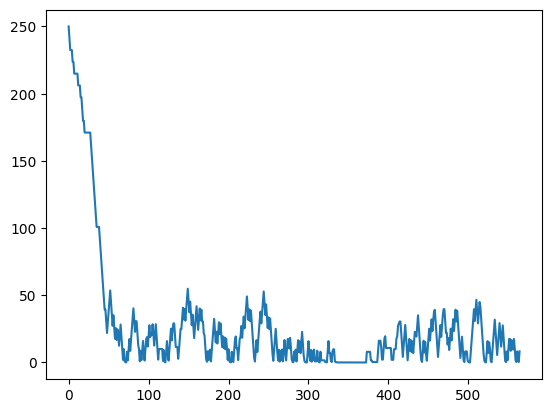

In [19]:
plt.plot(np.arange(len(df)), df.soc_after)

In [16]:
len(df)

565

In [21]:
action = (df.soc_after - df.soc_before)

(array([175.,  26.,   7.,   4.,  23., 124.,  10.,   1.,   3., 192.]),
 array([-8.77192982, -7.10307018, -5.43421053, -3.76535088, -2.09649123,
        -0.42763158,  1.24122807,  2.91008772,  4.57894737,  6.24780702,
         7.91666667]),
 <BarContainer object of 10 artists>)

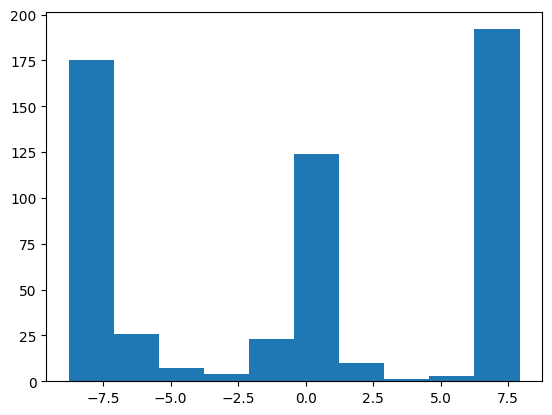

In [24]:
plt.hist(action, bins=10)

In [32]:
df = pd.read_csv('solar_us.csv')
df.columns

Index(['Plant Name', 'Developer Name', 'Capacity (MW)', 'Date of Operation',
       'County', 'State', 'Balancing Authority'],
      dtype='object')

In [34]:
df.head().sort_values(by=['Capacity (MW)'], ascending=False)

,Plant Name,Developer Name,Capacity (MW),Date of Operation,County,State,Balancing Authority
3,"Eland Solar & Storage Center, Phase 2 Hy",Avantus,200.0,01/07/2025,Kern,CA,LDWP
4,Bakeoven Solar,Avangrid Renewables,60.0,01/07/2025,Wasco,OR,AVRN
1,Corpus Refinery,Flint Hills Resources,27.5,01/07/2025,Nueces,TX,ERCO
0,CTGB Maloney and Webster,TotalEnergies,2.0,01/07/2025,Tolland,CT,ISNE
2,CSU Northridge Plant,Unable to find,0.8,01/07/2025,Los Angeles,CA,LDWP


In [67]:
df = pd.read_csv('data/Eland_Solar_and_Storage_Center_Phase_2_Hy_hourly_aqi_weather.csv')

In [68]:
df.shape

(192, 50)

In [69]:
df.columns

Index(['datetime', 'location_name', 'operator', 'capacity_mw', 'county',
       'state', 'grid', 'latitude', 'longitude', 'calculated_aqi', 'pm10',
       'pm2_5', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m',
       'precipitation', 'pressure_msl', 'carbon_monoxide', 'nitrogen_dioxide',
       'sulphur_dioxide', 'ozone', 'dust', 'uv_index', 'uv_index_clear_sky',
       'ammonia', 'alder_pollen', 'birch_pollen', 'grass_pollen',
       'mugwort_pollen', 'olive_pollen', 'ragweed_pollen', 'dew_point_2m',
       'apparent_temperature', 'rain', 'snowfall', 'weather_code',
       'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high', 'evapotranspiration', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_moisture_0_to_7cm'],
      dtype='object')

In [79]:
df_dropped = df.drop(['datetime', 'location_name', 'county', 'state', 'grid', 'operator'], axis=1)

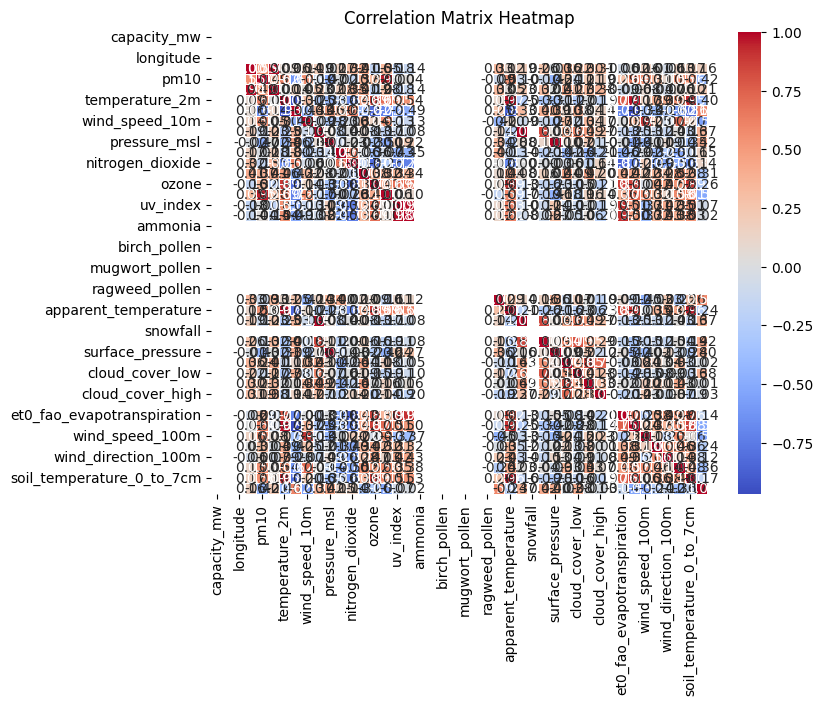

In [80]:


corr = df_dropped.corr()

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()